## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [2]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


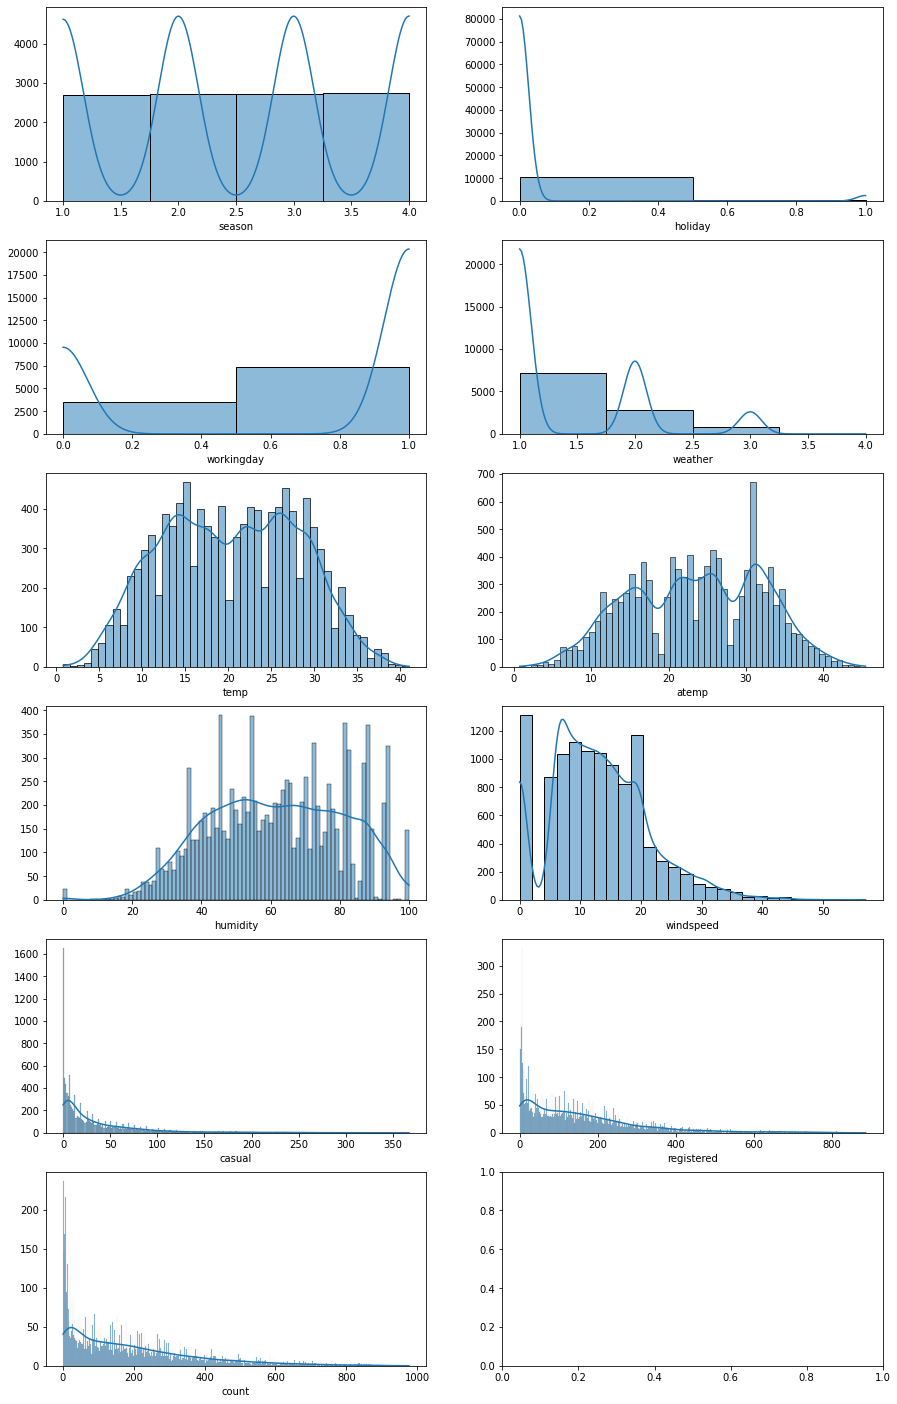

In [25]:
fig, axs = plt.subplots(nrows=np.ceil(df.shape[1]/2).astype(int),
                        ncols=2,
                        figsize=(15,25))

for index, column in enumerate(df.columns):
    ax = axs[np.floor(index/2).astype(int)][index%2]
    data = df[column]
    sns.histplot(data=data, ax=ax, bins=data.unique().shape[0], kde=True)

    ax.set_xlabel(column)
    ax.set_ylabel('')

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [56]:
def simple_analysis(df, column):
    data = df[column]
    print(column.capitalize())
    print(f'Mean: {data.mean()}')
    print(f'Variance: {data.var()}')
    print(f'50% quantile: {data.quantile(0.5)}')
    print(f'75% quantile: {data.quantile(0.75)}')
    print(f'99% quantile: {data.quantile(0.99)}')
    print(f'Mode: {data.mode().item()}\n')

In [59]:
for column in df.columns:
    simple_analysis(df, column)

Season
Mean: 2.5066139996325556
Variance: 1.2458450888402808
50% quantile: 3.0
75% quantile: 4.0
99% quantile: 4.0
Mode: 4

Holiday
Mean: 0.02856880396839978
Variance: 0.0277551770294743
50% quantile: 0.0
75% quantile: 0.0
99% quantile: 1.0
Mode: 0

Workingday
Mean: 0.6808745177291935
Variance: 0.21730437065606042
50% quantile: 1.0
75% quantile: 1.0
99% quantile: 1.0
Mode: 1

Weather
Mean: 1.418427337865148
Variance: 0.4017513528731512
50% quantile: 1.0
75% quantile: 2.0
99% quantile: 3.0
Mode: 1

Temp
Mean: 20.23085981995223
Variance: 60.708872296930195
50% quantile: 20.5
75% quantile: 26.24
99% quantile: 36.08
Mode: 14.76

Atemp
Mean: 23.655084052912
Variance: 71.81885577841908
50% quantile: 24.24
75% quantile: 31.06
99% quantile: 40.15
Mode: 31.06

Humidity
Mean: 61.88645967297446
Variance: 370.371305848029
50% quantile: 62.0
75% quantile: 77.0
99% quantile: 100.0
Mode: 88

Windspeed
Mean: 12.7993954069447
Variance: 66.65966976134224
50% quantile: 12.998
75% quantile: 16.9979
99% qu

### Говоря о количестве аренд, бОльшая часть пользователей зарегистрированные, сильный разброс кол-ва аренд, распределение далеко от нормального. У температуры могут быть разные кластеры связанные с сезонностью, а у скорости ветра значения от 2 до 3 почти отсутсвуют.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [68]:
def kurtosis_skew(df, column):
    print(column.capitalize())
    print(f'Kurtosis: {kurtosis(df[column])}')
    print(f'Skew: {skew(df[column])}\n')

In [71]:
for column in df.columns:
    kurtosis_skew(df, column)

Season
Kurtosis: -1.3555899543299803
Skew: -0.007074695296526289

Holiday
Kurtosis: 30.032624417535125
Skew: 5.6597371332540805

Workingday
Kurtosis: -1.3977369782030475
Skew: -0.7760560687198784

Weather
Kurtosis: 0.39480007841067577
Skew: 1.2433126730817885

Temp
Kurtosis: -0.9146613849825282
Skew: 0.0036903358354289715

Atemp
Kurtosis: -0.8502363689497141
Skew: -0.10254538108264065

Humidity
Kurtosis: -0.760019710012902
Skew: -0.0863232869219358

Windspeed
Kurtosis: 0.629292367034056
Skew: 0.5886853963635482

Casual
Kurtosis: 7.547610130561701
Skew: 2.495404491505502

Registered
Kurtosis: 2.6243238654959855
Skew: 1.5245944734221468

Count
Kurtosis: 1.2989447727380323
Skew: 1.241895058803035



### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [72]:
highest_variance_column = ''
highest_variance = 0
for column in df.columns:
    var = df[column].var()
    if var > highest_variance:
        highest_variance = var
        highest_variance_column = column

print(highest_variance_column)
print(highest_variance)

count
32813.31315347235


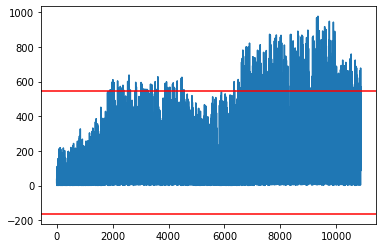

In [88]:
data = df[highest_variance_column]
interval = stats.norm.interval(0.95, loc=data.mean(), scale=data.std())

data.plot()
plt.axhline(interval[1], color='red')
plt.axhline(interval[0], color='red')
plt.show()

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [92]:
def outliers_count(df, column):
    print(column.capitalize())

    data = df[column]
    lower = data.mean() - (data.std() * 3)
    uper = data.mean() + (data.std() * 3)
    cnt = data[(data < lower) | (data > uper)].shape[0]
    print(f'{cnt}\n')

In [95]:
for column in df.columns:
    outliers_count(df, column)

Season
0

Holiday
311

Workingday
0

Weather
1

Temp
0

Atemp
0

Humidity
22

Windspeed
67

Casual
292

Registered
235

Count
147



### Больше всего аномалий в колонке с арендами незарегестрированых пользователей (casual)

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

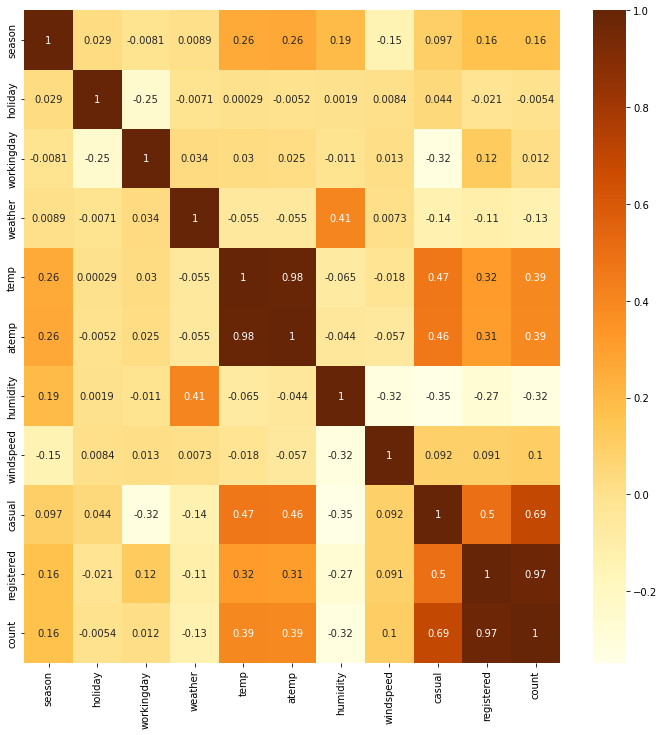

In [106]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, ax=ax, cmap="YlOrBr", annot=True)
plt.show()

### Нас больше всего интересует количество аренд, общее кол-во аренд больше кореллирует с кол-вом аренд зарегестрированных пользователей, скорее всего потому-что их просто больше, но интересно то что кол-во аренд слабо-умеренно положительно кореллирует с температурой и влажностью воздуха и почти не кореллирует со скоростью ветра. Можно сказать что пользователи чаще арендуют велосипеды в теплое время6 что логично, но скорость ветра на них почти не влияет.